In [53]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import random
from sklearn.model_selection import train_test_split

In [54]:
def load_data():
    boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
    Y=load_boston().target
    X=load_boston().data
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test=scaler.transform(x_test)

    train_data=pd.DataFrame(x_train)
    train_data['price']=y_train
    train_data.head(3)

    x_test=np.array(x_test)
    y_test=np.array(y_test)
    
    return train_data, x_test, y_test

train_data, x_test, y_test = load_data()

In [55]:
def stochastic_gradient(train_data,learning_rate,n_iter):
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 
        temp=train_data.sample(1)
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        prediction=np.dot(w,x[0])+b
        w_gradient=w_gradient+(-2)*x[0]*(y[0]-(prediction))
        b_gradient=b_gradient+(-2)*(y[0]-(prediction))
        
        w=w-learning_rate*(w_gradient)
        b=b-learning_rate*(b_gradient)

        cur_iter=cur_iter+1
        
    return w,b

In [56]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

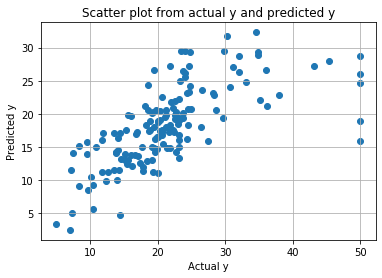

Mean Squared Error : 51.67764590396789


In [57]:
w,b=stochastic_gradient(train_data,learning_rate=0.01,n_iter=100)
y_pred=predict(x_test,w,b)

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))